In [189]:
# Import necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [190]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['font.size'] = 12

In [220]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment_duration', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age',
    'other_installment_plans', 'housing', 'number_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'
]

df = pd.read_csv(url, delimiter=' ', names=column_names, header=None)
print(df.head())
print(" status:", df['status'].unique())
print(" job:", df['job'].unique())


  status  duration credit_history purpose  amount savings employment_duration  \
0    A11         6            A34     A43    1169     A65                 A75   
1    A12        48            A32     A43    5951     A61                 A73   
2    A14        12            A34     A46    2096     A61                 A74   
3    A11        42            A32     A42    7882     A61                 A74   
4    A11        24            A33     A40    4870     A61                 A73   

   installment_rate personal_status_sex other_debtors  ...  property age  \
0                 4                 A93          A101  ...      A121  67   
1                 2                 A92          A101  ...      A121  22   
2                 2                 A93          A101  ...      A121  49   
3                 2                 A93          A103  ...      A122  45   
4                 3                 A93          A101  ...      A124  53   

   other_installment_plans housing number_credits   job 

In [216]:
df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [217]:
# ÿß€åÿ¨ÿßÿØ ŸÜ⁄Øÿßÿ¥ÿ™ ŸÖÿπŸÜÿßÿØÿßÿ± ÿ®ÿ±ÿß€å ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ⁄©€åŸÅ€å

employment_mapping = {
    'A71': 'ÿ®€å⁄©ÿßÿ±',
    'A72': '⁄©ŸÖÿ™ÿ± ÿßÿ≤ €± ÿ≥ÿßŸÑ',
    'A73': '€±-€¥ ÿ≥ÿßŸÑ',
    'A74': '€¥-€∑ ÿ≥ÿßŸÑ',
    'A75': 'ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €∑ ÿ≥ÿßŸÑ'
}
df['employment_duration'] = df['employment_duration'].map(employment_mapping)

personal_status_mapping = {
    'A91': 'ŸÖÿ±ÿØ ŸÖÿ∑ŸÑŸÇŸá/ÿ¨ÿØÿß ÿ¥ÿØŸá',
    'A92': 'ÿ≤ŸÜ ŸÖÿ∑ŸÑŸÇŸá/ÿ¨ÿØÿß ÿ¥ÿØŸá/ŸÖÿ™ÿßŸáŸÑ',
    'A93': 'ŸÖÿ±ÿØ ŸÖÿ¨ÿ±ÿØ',
    'A94': 'ŸÖÿ±ÿØ ŸÖÿ™ÿßŸáŸÑ/ÿ®€åŸàŸá',
    'A95': 'ÿ≤ŸÜ ŸÖÿ¨ÿ±ÿØ'
}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_mapping)

job_mapping = {
    'A171': 'ÿ®€å⁄©ÿßÿ±',
    'A172': '⁄©ÿßÿ±⁄Øÿ± ÿ≥ÿßÿØŸá',
    'A173': '⁄©ÿßÿ±⁄Øÿ± ŸÖÿßŸáÿ±',
    'A174': 'ŸÖÿØ€åÿ±/ÿÆŸà€åÿ¥ ŸÅÿ±ŸÖÿß'
}
df['job'] = df['job'].map(job_mapping)

status_mapping = {
    'A11': '⁄©ŸÖÿ™ÿ± ÿßÿ≤ €∞ ŸÖÿßÿ±⁄©',
    'A12': '€∞-€≤€∞€∞ ŸÖÿßÿ±⁄©',
    'A13': 'ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €≤€∞€∞ ŸÖÿßÿ±⁄©',
    'A14': 'ÿ®ÿØŸàŸÜ ÿ≠ÿ≥ÿßÿ® ÿ¨ÿßÿ±€å'
}
df['status'] = df['status'].map(status_mapping)

credit_history_mapping = {
    'A30': 'ÿ®ÿØŸàŸÜ ŸàÿßŸÖ/ŸáŸÖŸá Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá',
    'A31': 'ŸáŸÖŸá Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá',
    'A32': 'ŸàÿßŸÖ Ÿáÿß€å ŸÖŸàÿ¨ŸàÿØ Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá',
    'A33': 'ÿ™ÿßÿÆ€åÿ± Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá',
    'A34': 'Ÿàÿ∂ÿπ€åÿ™ ÿ®ÿ≠ÿ±ÿßŸÜ€å/ÿ≥ÿß€åÿ±'
}
df['credit_history'] = df['credit_history'].map(credit_history_mapping)

purpose_mapping = {
    'A40': 'ÿÆŸàÿØÿ±Ÿà (ŸÜŸà)', 'A41': 'ÿÆŸàÿØÿ±Ÿà (⁄©ÿßÿ±⁄©ÿ±ÿØŸá)', 'A42': 'ŸÑŸàÿßÿ≤ŸÖ ÿÆÿßŸÜ⁄Ø€å',
    'A43': 'ÿ±ÿßÿØ€åŸà/ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ', 'A44': 'Ÿàÿ≥ÿß€åŸÑ ÿÆÿßŸÜŸá', 'A45': 'ÿ™ÿπŸÖ€åÿ±ÿßÿ™',
    'A46': 'ÿ¢ŸÖŸàÿ≤ÿ¥', 'A47': 'ŸÖÿ≥ÿßŸÅÿ±ÿ™', 'A48': 'ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿ¨ÿØÿØ',
    'A49': '⁄©ÿ≥ÿ® Ÿà ⁄©ÿßÿ±', 'A410': 'ÿ≥ÿß€åÿ±'
}
df['purpose'] = df['purpose'].map(purpose_mapping)


# ÿß€åÿ¨ÿßÿØ ⁄Øÿ±ŸàŸá‚ÄåŸáÿß€å ÿ≥ŸÜ€å
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 75],
                        labels=['25-18', '35-26', '45-36', '55-46', '65-56', '75+'])


# ÿß€åÿ¨ÿßÿØ ⁄Øÿ±ŸàŸá‚ÄåŸáÿß€å ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ
df['amount_group'] = pd.cut(df['amount'], bins=[0, 1000, 2000, 5000, 10000, 20000],
                           labels=['⁄©ŸÖÿ™ÿ± ÿßÿ≤ 1000', '2000-1000', '5000-2000', '10000-5000', 'ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ 10000'])

print("=" * 70)
print("ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ÿßŸÖÿπ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±€å - ÿ™ŸÖÿ±⁄©ÿ≤ ÿ®ÿ± ÿ≥ŸÜÿå ÿ¥ÿ∫ŸÑ Ÿà ÿ™ÿ±ÿß⁄©ŸÜÿ¥‚ÄåŸáÿß")
print("=" * 70)
print(df.info())


ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ÿßŸÖÿπ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±€å - ÿ™ŸÖÿ±⁄©ÿ≤ ÿ®ÿ± ÿ≥ŸÜÿå ÿ¥ÿ∫ŸÑ Ÿà ÿ™ÿ±ÿß⁄©ŸÜÿ¥‚ÄåŸáÿß
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   object  
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   object  
 3   purpose                  1000 non-null   object  
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   object  
 6   employment_duration      1000 non-null   object  
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   object  
 9   other_debtors            1000 non-null   object  
 10  present_residence        1000 non-null   int64   
 11  property                 1000 non-null   object  
 12  age        

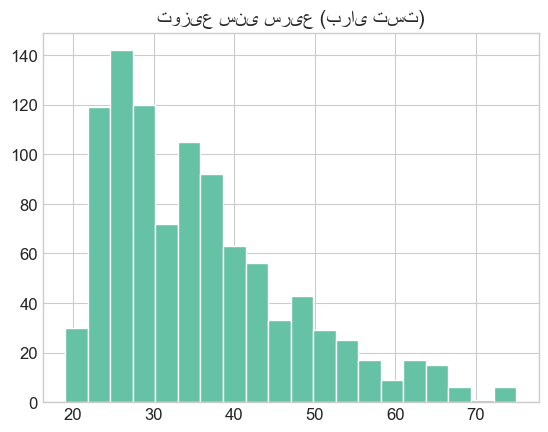

In [218]:
df['age'].hist(bins=20)
plt.title("ÿ™Ÿàÿ≤€åÿπ ÿ≥ŸÜ€å ÿ≥ÿ±€åÿπ")
plt.show()


In [198]:
# 1. ÿ™ÿ≠ŸÑ€åŸÑ ⁄©ŸÑ€å ÿØÿßÿØŸá‚ÄåŸáÿß
print("="*60)
print("ÿ™ÿ≠ŸÑ€åŸÑ ⁄©ŸÑ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±€å")
print("="*60)
print("ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® Ÿà ÿ®ÿØ:")
risk_counts = df['credit_risk'].value_counts()
print(risk_counts)
print("\nŸÜÿ≥ÿ®ÿ™ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® Ÿà ÿ®ÿØ:")
risk_ratios = df['credit_risk'].value_counts(normalize=True)
print(risk_ratios)

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿØÿßÿØŸá‚ÄåŸáÿß ÿ¥ÿßŸÖŸÑ €∑€∞Ÿ™ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® Ÿà €≥€∞Ÿ™ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿØ Ÿáÿ≥ÿ™ŸÜÿØ ⁄©Ÿá ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ÿ™Ÿàÿ≤€åÿπ ŸÜÿßŸÖÿ™ÿπÿßÿØŸÑ ÿßÿ≥ÿ™

ÿ™ÿ≠ŸÑ€åŸÑ ⁄©ŸÑ€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿπÿ™ÿ®ÿßÿ±€å
ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® Ÿà ÿ®ÿØ:
credit_risk
1    700
0    300
Name: count, dtype: int64

ŸÜÿ≥ÿ®ÿ™ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® Ÿà ÿ®ÿØ:
credit_risk
1    0.7
0    0.3
Name: proportion, dtype: float64


In [199]:
# 2. ÿ™ÿ≠ŸÑ€åŸÑ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿπÿØÿØ€å
numeric_columns = ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
print("\nÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿπÿØÿØ€å:")
print(df[numeric_columns].describe())

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ŸÖÿØÿ™ ŸàÿßŸÖ ÿ®€åŸÜ €¥ ÿ™ÿß €∑€≤ ŸÖÿßŸá Ÿà ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ÿ®€åŸÜ €≤€µ€∞ ÿ™ÿß €±€∏€¥€≤€¥ ŸÖÿßÿ±⁄© ŸÖÿ™ÿ∫€åÿ± ÿßÿ≥ÿ™
# ÿ≥ŸÜ ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ ÿßÿ≤ €±€π ÿ™ÿß €∑€µ ÿ≥ÿßŸÑ ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ €≥€µ ÿ≥ÿßŸÑ ÿßÿ≥ÿ™


ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß€å ÿπÿØÿØ€å:
          duration        amount  installment_rate  present_residence  \
count  1000.000000   1000.000000       1000.000000        1000.000000   
mean     20.903000   3271.258000          2.973000           2.845000   
std      12.058814   2822.736876          1.118715           1.103718   
min       4.000000    250.000000          1.000000           1.000000   
25%      12.000000   1365.500000          2.000000           2.000000   
50%      18.000000   2319.500000          3.000000           3.000000   
75%      24.000000   3972.250000          4.000000           4.000000   
max      72.000000  18424.000000          4.000000           4.000000   

               age  number_credits  people_liable  
count  1000.000000     1000.000000    1000.000000  
mean     35.546000        1.407000       1.155000  
std      11.375469        0.577654       0.362086  
min      19.000000        1.000000       1.000000  
25%      27.000000        1.0

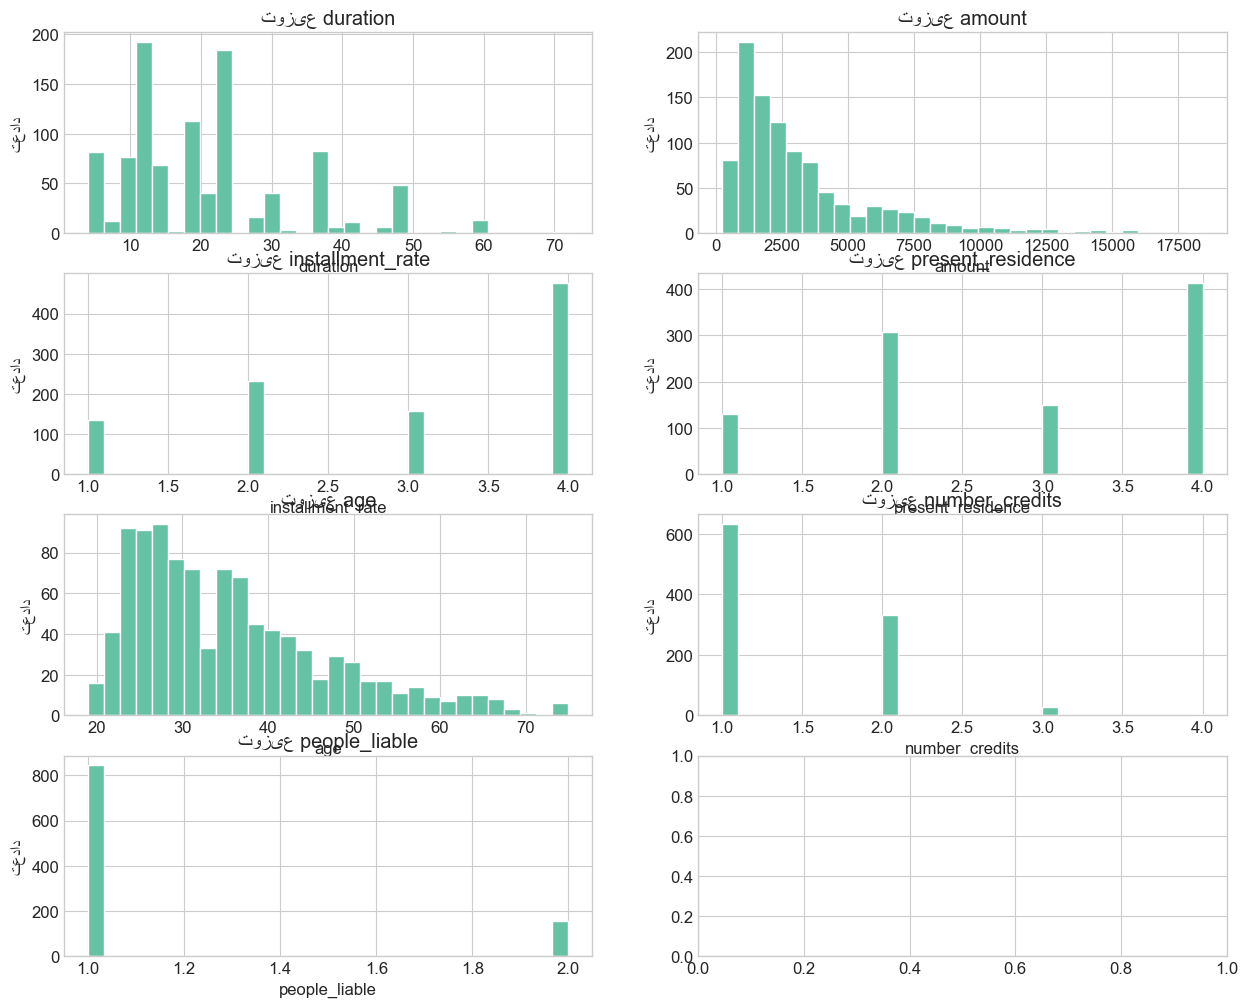

In [203]:
# ÿß€åÿ¨ÿßÿØ Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿ®ÿ±ÿß€å ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿπÿØÿØ€å
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_columns):
    df[feature].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'ÿ™Ÿàÿ≤€åÿπ {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('ÿ™ÿπÿØÿßÿØ')




# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿ™Ÿàÿ≤€åÿπ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ⁄ÜŸàŸÑ⁄Ø€å ÿ®Ÿá ÿ±ÿßÿ≥ÿ™ ÿßÿ≥ÿ™ Ÿà ÿ®€åÿ¥ÿ™ÿ± ŸàÿßŸÖ‚ÄåŸáÿß ŸÖÿ®ÿßŸÑÿ∫ ŸÖÿ™Ÿàÿ≥ÿ∑ ÿØÿßÿ±ŸÜÿØ
# ÿ™Ÿàÿ≤€åÿπ ÿ≥ŸÜ ÿ™ŸÇÿ±€åÿ®ÿßŸã ŸÜÿ±ŸÖÿßŸÑ ÿßÿ≥ÿ™ ÿ®ÿß ÿ™ŸÖÿ±⁄©ÿ≤ ÿØÿ± ŸÖÿ≠ÿØŸàÿØŸá €≤€µ-€¥€µ ÿ≥ÿßŸÑ

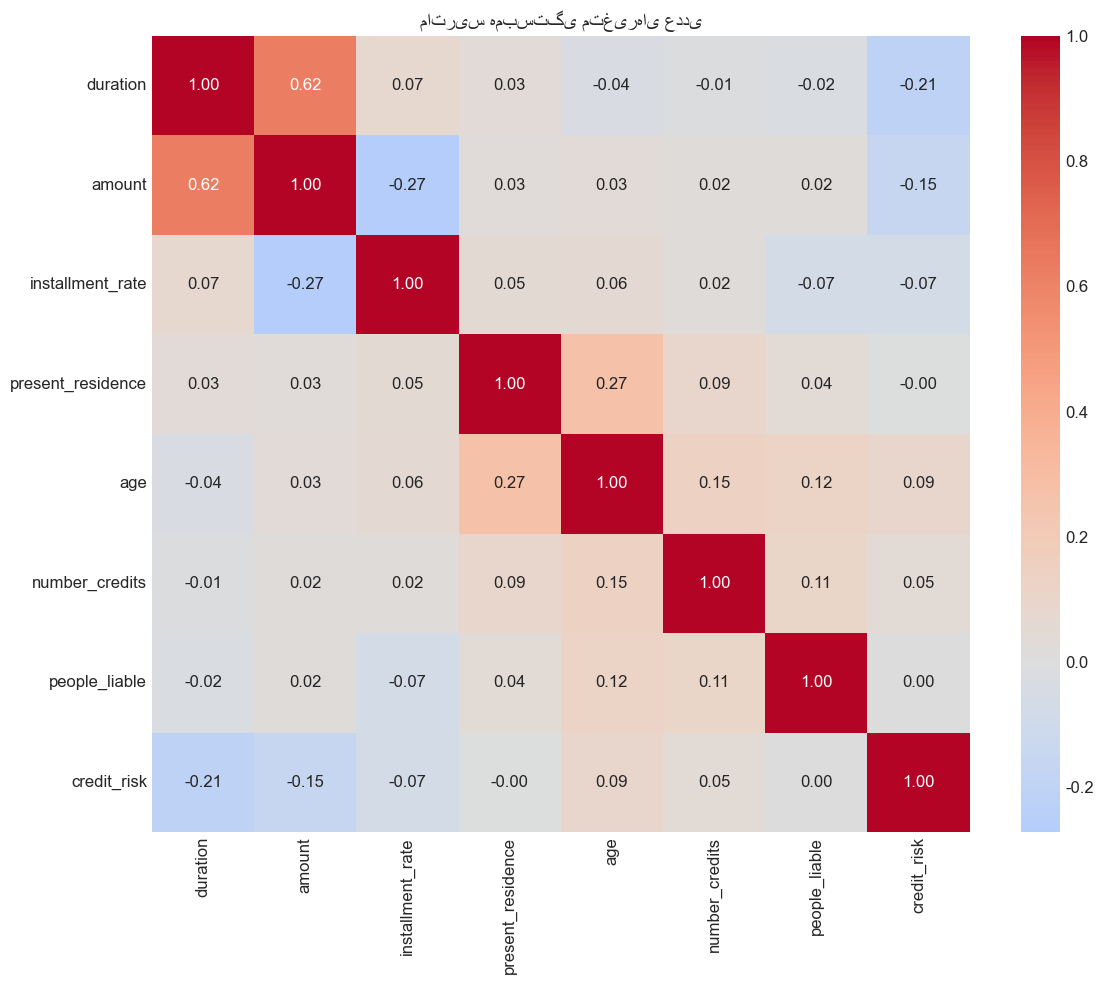

In [204]:
# ÿ™ÿ≠ŸÑ€åŸÑ ŸáŸÖÿ®ÿ≥ÿ™⁄Ø€å ÿ®€åŸÜ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns + ['credit_risk']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('ŸÖÿßÿ™ÿ±€åÿ≥ ŸáŸÖÿ®ÿ≥ÿ™⁄Ø€å ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿπÿØÿØ€å')
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ŸáŸÖÿ®ÿ≥ÿ™⁄Ø€å ŸÖÿ´ÿ®ÿ™ ŸÇŸà€å ÿ®€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ Ÿà ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ (€∞.€∂€≤)
# ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å ŸáŸÖÿ®ÿ≥ÿ™⁄Ø€å ŸÖŸÜŸÅ€å ÿ∂ÿπ€åŸÅ€å ÿ®ÿß ŸÖÿØÿ™ ŸàÿßŸÖ ÿØÿßÿ±ÿØ

ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ Ÿàÿ∂ÿπ€åÿ™ ÿ≠ÿ≥ÿßÿ®:
status
ÿ®ÿØŸàŸÜ ÿ≠ÿ≥ÿßÿ® ÿ¨ÿßÿ±€å       0.883249
ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €≤€∞€∞ ŸÖÿßÿ±⁄©    0.777778
⁄©ŸÖÿ™ÿ± ÿßÿ≤ €∞ ŸÖÿßÿ±⁄©       0.507299
€∞-€≤€∞€∞ ŸÖÿßÿ±⁄©           0.609665
Name: credit_risk, dtype: float64


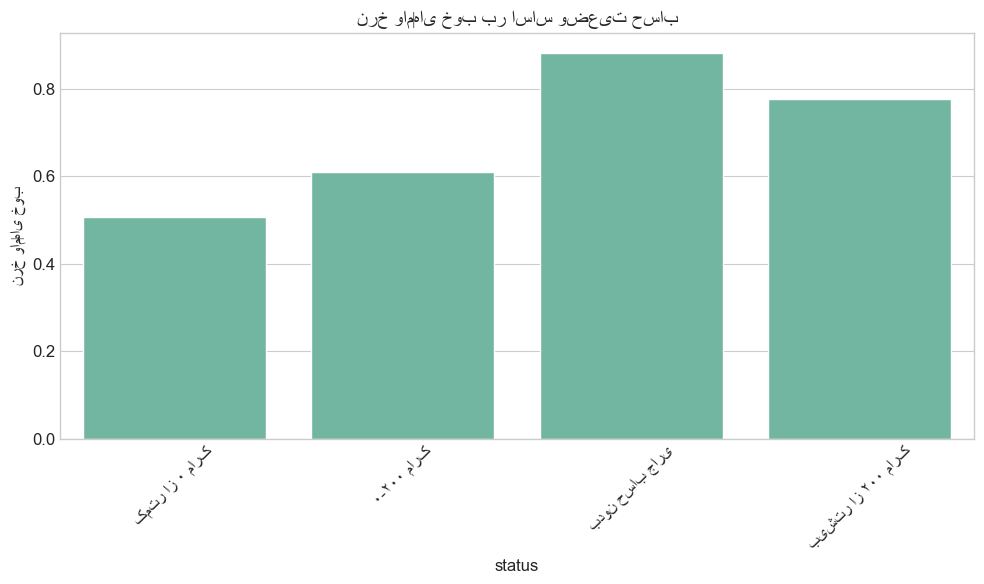

In [205]:
# ÿ™ÿ≠ŸÑ€åŸÑ Ÿàÿ∂ÿπ€åÿ™ ÿ≠ÿ≥ÿßÿ®
status_analysis = df.groupby('status')['credit_risk'].mean()
print("ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ Ÿàÿ∂ÿπ€åÿ™ ÿ≠ÿ≥ÿßÿ®:")
print(status_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ Ÿàÿ∂ÿπ€åÿ™ ÿ≠ÿ≥ÿßÿ®')
plt.xticks(rotation=45)
plt.ylabel('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ®')
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿßŸÅÿ±ÿßÿØ ÿ®ÿß ÿ≠ÿ≥ÿßÿ® ÿ®ÿßŸÑÿß€å €≤€∞€∞ ŸÖÿßÿ±⁄© ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∏€∞Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ÿßŸÅÿ±ÿßÿØ ÿ®ÿØŸàŸÜ ÿ≠ÿ≥ÿßÿ® ÿ®ÿØÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€¥€∞Ÿ™) ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ

ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å:
age_group
25-18    0.578947
35-26    0.703518
45-36    0.756637
55-46    0.756522
65-56    0.735849
75+      0.722222
Name: credit_risk, dtype: float64


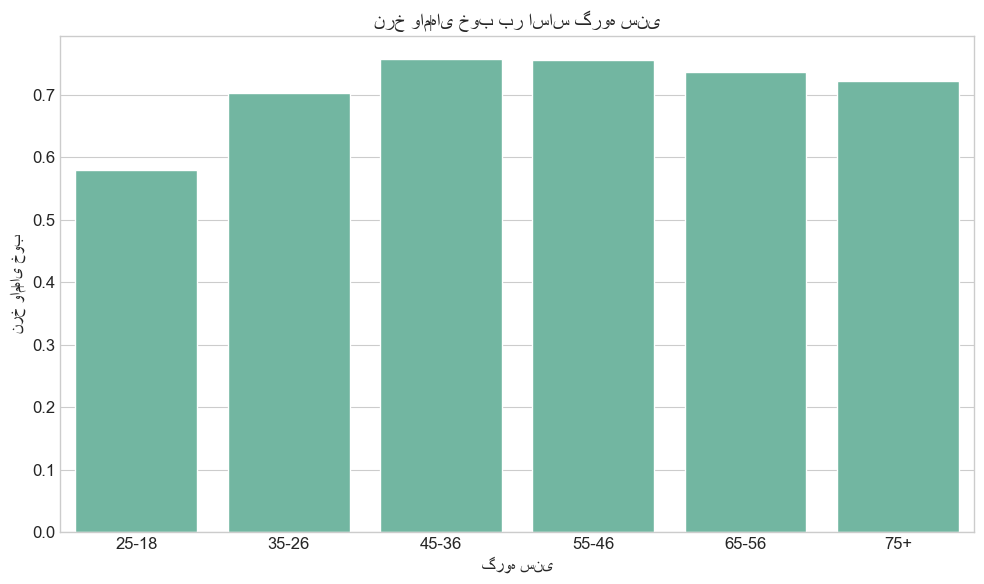

In [206]:
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ≥ŸÜ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å
age_analysis = df.groupby('age_group')['credit_risk'].mean()
print("ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å:")
print(age_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å')
plt.xlabel('⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å')
plt.ylabel('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ®')
plt.tight_layout()
plt.show()


# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∑€∏Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ÿ¨ŸàÿßŸÜÿßŸÜ €±€∏-€≤€µ ÿ≥ÿßŸÑŸá ÿ®ÿØÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€µ€µŸ™) ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ

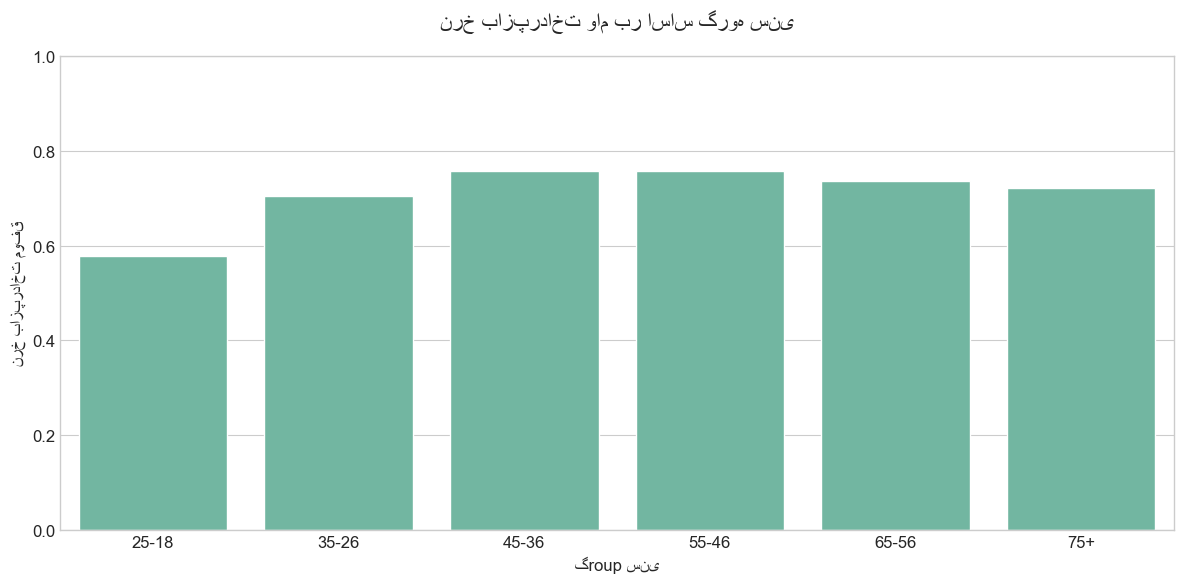

In [207]:


# ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≥ŸÜ
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='credit_risk', data=df, ci=None)
plt.title('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸàÿßŸÖ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å', fontsize=16, pad=20)
plt.xlabel('⁄Øroup ÿ≥ŸÜ€å')
plt.ylabel('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸÖŸàŸÅŸÇ')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá ÿ®Ÿáÿ™ÿ±€åŸÜ  ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∑€∏Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ÿ¨ŸàÿßŸÜÿßŸÜ €±€∏-€≤€µ ÿ≥ÿßŸÑŸá ⁄©ŸÖÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€µ€µŸ™) ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ
# ÿ®ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ÿ≥ŸÜÿå ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ÿßŸÅÿ≤ÿß€åÿ¥ ŸÖ€å‚Äå€åÿßÿ®ÿØ

ÿ™ÿ≠ŸÑ€åŸÑ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å
                ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ  ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ
amount_group                                                         
⁄©ŸÖÿ™ÿ± ÿßÿ≤ 1000          116          0.681           11.509      35.086
2000-1000             316          0.734           15.085      36.041
5000-2000             380          0.734           22.066      34.595
10000-5000            148          0.635           32.493      36.878
ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ 10000         40          0.400           40.175      37.075


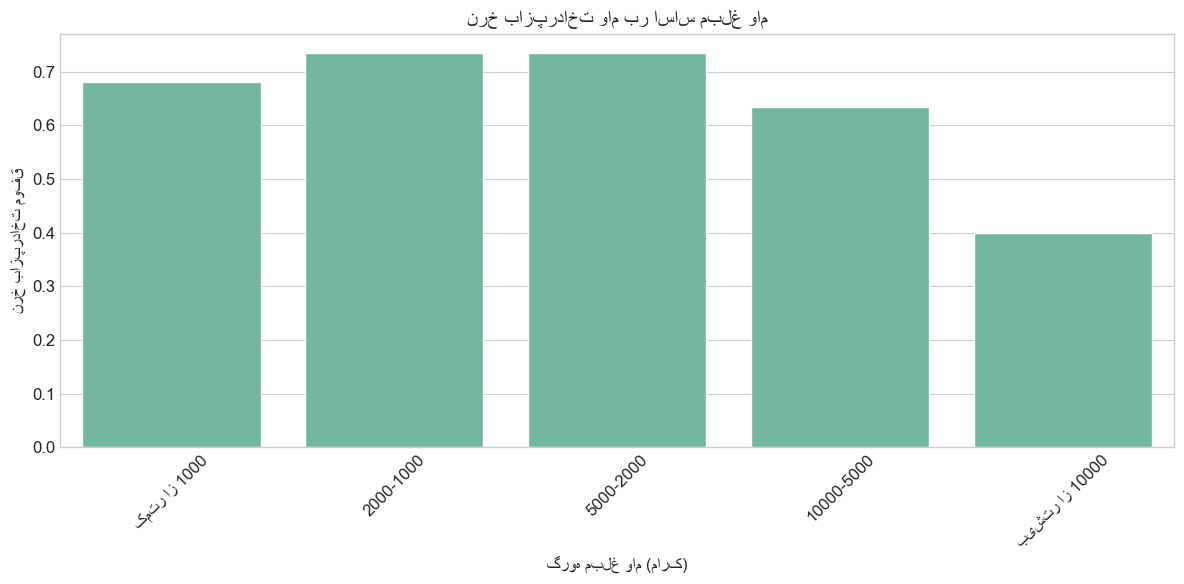

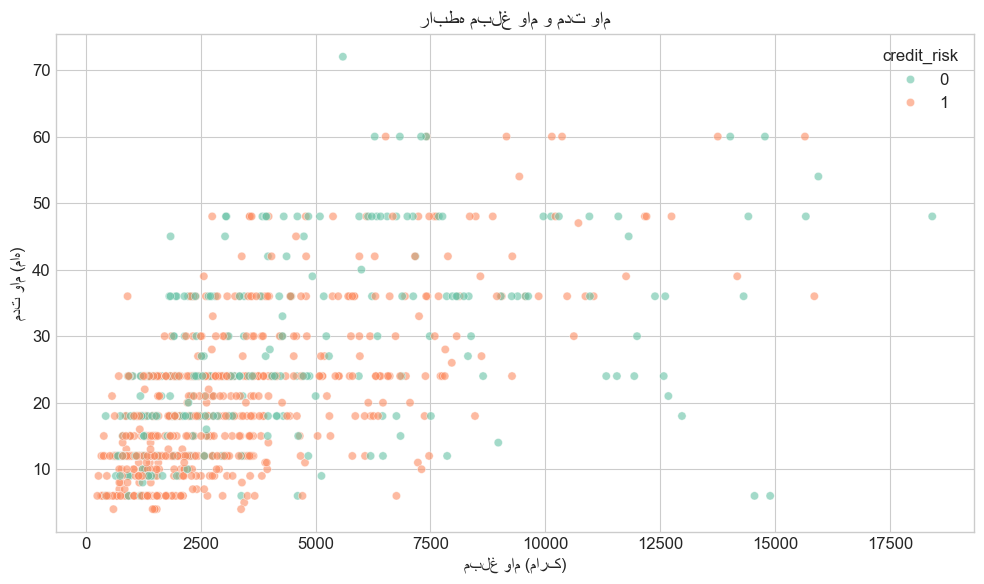

In [208]:
# ÿ™ÿ≠ŸÑ€åŸÑ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å

print("ÿ™ÿ≠ŸÑ€åŸÑ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å")

amount_analysis = df.groupby('amount_group').agg({
    'credit_risk': ['count', 'mean'],
    'duration': 'mean',
    'age': 'mean'
}).round(3)

amount_analysis.columns = ['ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ', 'ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ']
print(amount_analysis)

# ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ
plt.figure(figsize=(12, 6))
sns.barplot(x='amount_group', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸàÿßŸÖ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ')
plt.xlabel('⁄Øÿ±ŸàŸá ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ (ŸÖÿßÿ±⁄©)')
plt.ylabel('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸÖŸàŸÅŸÇ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ÿ™ÿ≠ŸÑ€åŸÑ ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ®ŸÑÿ∫ Ÿà ŸÖÿØÿ™ ŸàÿßŸÖ
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=df, alpha=0.6)
plt.title('ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿà ŸÖÿØÿ™ ŸàÿßŸÖ')
plt.xlabel('ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ (ŸÖÿßÿ±⁄©)')
plt.ylabel('ŸÖÿØÿ™ ŸàÿßŸÖ (ŸÖÿßŸá)')
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿ®ŸÑÿ∫ ŸÖÿ™Ÿàÿ≥ÿ∑ (2000-5000 ŸÖÿßÿ±⁄©) ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿ≥€åÿßÿ± ⁄©Ÿà⁄Ü⁄© €åÿß ÿ®ÿ≥€åÿßÿ± ÿ®ÿ≤ÿ±⁄Ø ÿ±€åÿ≥⁄© ÿ®ÿßŸÑÿßÿ™ÿ±€å ÿØÿßÿ±ŸÜÿØ
# ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ´ÿ®ÿ™ ŸÇŸà€å ÿ®€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ Ÿà ŸÖÿØÿ™ ŸàÿßŸÖ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ

ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ
                        ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ  ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ
personal_status_sex                                                           
ÿ≤ŸÜ ŸÖÿ∑ŸÑŸÇŸá/ÿ¨ÿØÿß ÿ¥ÿØŸá/ŸÖÿ™ÿßŸáŸÑ        310          0.648          2877.774      32.803
ŸÖÿ±ÿØ ŸÖÿ™ÿßŸáŸÑ/ÿ®€åŸàŸá                 92          0.728          2045.543      30.348
ŸÖÿ±ÿØ ŸÖÿ¨ÿ±ÿØ                      548          0.734          3661.903      37.688
ŸÖÿ±ÿØ ŸÖÿ∑ŸÑŸÇŸá/ÿ¨ÿØÿß ÿ¥ÿØŸá              50          0.600          3684.700      38.640


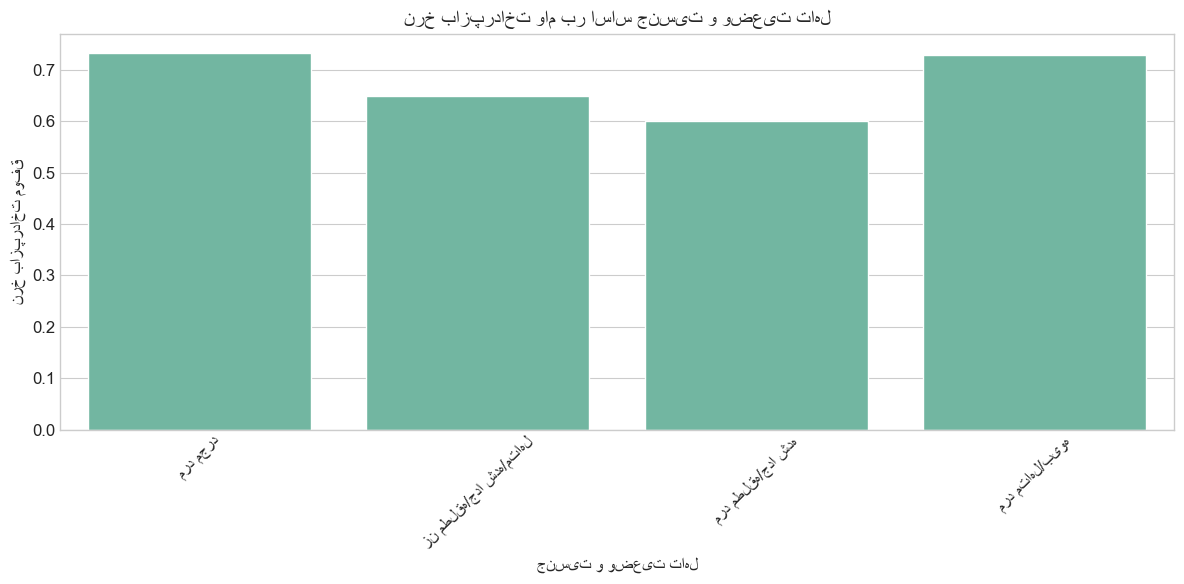

In [209]:
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ
print("ÿ™ÿ≠ŸÑ€åŸÑ ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ")

gender_analysis = df.groupby('personal_status_sex').agg({
    'credit_risk': ['count', 'mean'],
    'amount': 'mean',
    'age': 'mean'
}).round(3)

gender_analysis.columns = ['ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ', 'ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ']
print(gender_analysis)

# ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ
plt.figure(figsize=(12, 6))
sns.barplot(x='personal_status_sex', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸàÿßŸÖ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ')
plt.xlabel('ÿ¨ŸÜÿ≥€åÿ™ Ÿà Ÿàÿ∂ÿπ€åÿ™ ÿ™ÿßŸáŸÑ')
plt.ylabel('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸÖŸàŸÅŸÇ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿ≤ŸÜÿßŸÜ ŸÖÿ¨ÿ±ÿØ ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∏€≤Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ŸÖÿ±ÿØÿßŸÜ ŸÖÿ¨ÿ±ÿØ ⁄©ŸÖÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€µ€≤Ÿ™) ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ
# ŸÖÿ±ÿØÿßŸÜ ŸÖÿ™ÿßŸáŸÑ ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ÿ±ÿß ÿØÿ±€åÿßŸÅÿ™ ŸÖ€å‚Äå⁄©ŸÜŸÜÿØ

ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≥ÿßÿ®ŸÇŸá ÿßÿπÿ™ÿ®ÿßÿ±€å:
credit_history
Ÿàÿ∂ÿπ€åÿ™ ÿ®ÿ≠ÿ±ÿßŸÜ€å/ÿ≥ÿß€åÿ±           0.829352
ÿ™ÿßÿÆ€åÿ± Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá            0.681818
ŸàÿßŸÖ Ÿáÿß€å ŸÖŸàÿ¨ŸàÿØ Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá    0.681132
ŸáŸÖŸá Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá              0.428571
ÿ®ÿØŸàŸÜ ŸàÿßŸÖ/ŸáŸÖŸá Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá     0.375000
Name: credit_risk, dtype: float64


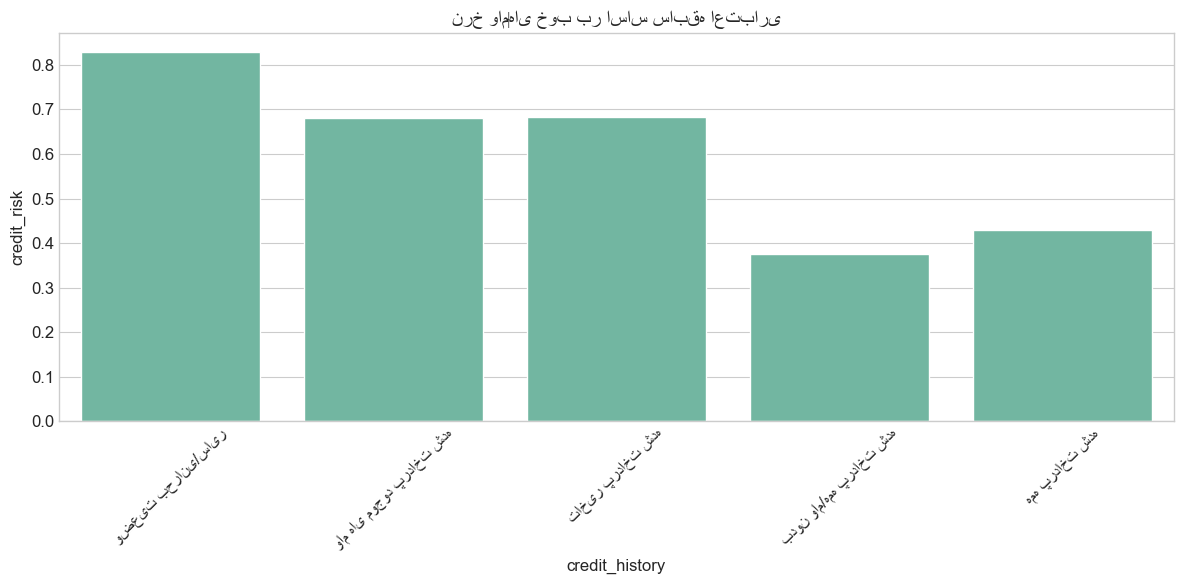

In [210]:
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ≥ÿßÿ®ŸÇŸá ÿßÿπÿ™ÿ®ÿßÿ±€å
history_analysis = df.groupby('credit_history')['credit_risk'].mean()
print("ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≥ÿßÿ®ŸÇŸá ÿßÿπÿ™ÿ®ÿßÿ±€å:")
print(history_analysis.sort_values(ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(x='credit_history', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≥ÿßÿ®ŸÇŸá ÿßÿπÿ™ÿ®ÿßÿ±€å')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿ≥ÿßÿ®ŸÇŸá ÿßÿπÿ™ÿ®ÿßÿ±€å ŸÇŸà€å‚Äåÿ™ÿ±€åŸÜ Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å⁄©ŸÜŸÜÿØŸá ÿ±€åÿ≥⁄© ÿßÿ≥ÿ™
# ÿßŸÅÿ±ÿßÿØ€å ÿ®ÿß ÿ≥ÿßÿ®ŸÇŸá "ŸáŸÖŸá Ÿæÿ±ÿØÿßÿÆÿ™ ÿ¥ÿØŸá" €∏€µŸ™ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿØÿßÿ±ŸÜÿØ

ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸáÿØŸÅ ŸàÿßŸÖ:
purpose
ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿ¨ÿØÿØ         0.888889
ÿÆŸàÿØÿ±Ÿà (⁄©ÿßÿ±⁄©ÿ±ÿØŸá)    0.834951
ÿ±ÿßÿØ€åŸà/ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ     0.778571
ŸÑŸàÿßÿ≤ŸÖ ÿÆÿßŸÜ⁄Ø€å        0.679558
Ÿàÿ≥ÿß€åŸÑ ÿÆÿßŸÜŸá         0.666667
⁄©ÿ≥ÿ® Ÿà ⁄©ÿßÿ±          0.649485
ÿ™ÿπŸÖ€åÿ±ÿßÿ™            0.636364
ÿÆŸàÿØÿ±Ÿà (ŸÜŸà)         0.619658
ÿ≥ÿß€åÿ±               0.583333
ÿ¢ŸÖŸàÿ≤ÿ¥              0.560000
Name: credit_risk, dtype: float64


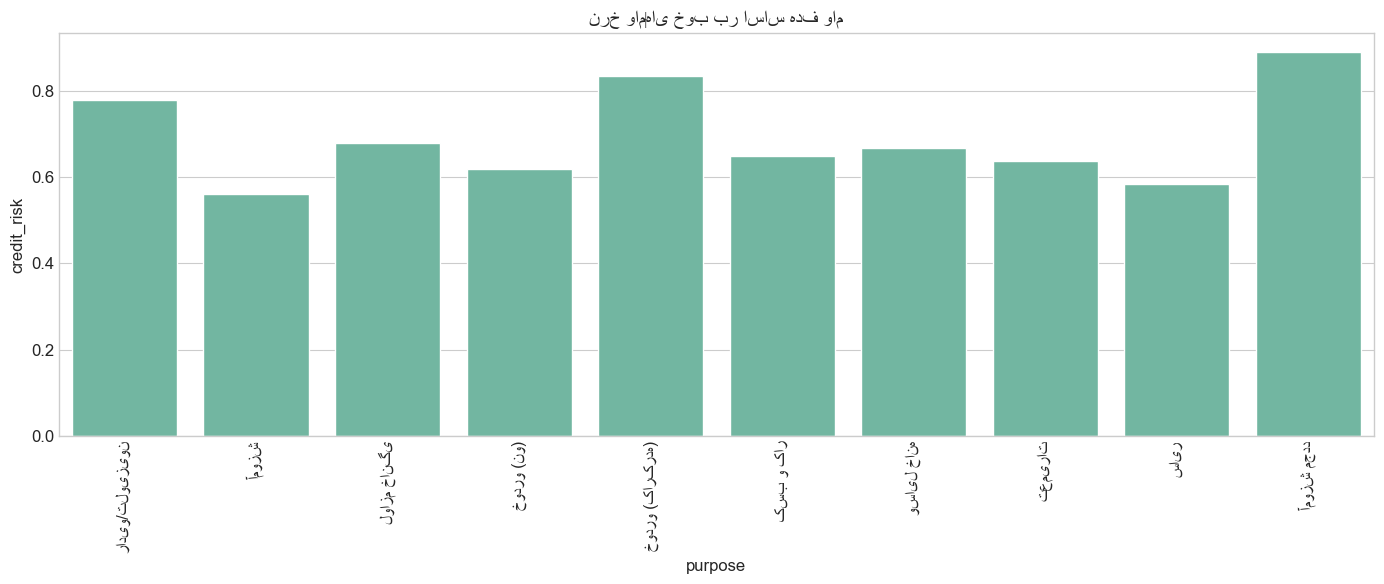

In [211]:
# ÿ™ÿ≠ŸÑ€åŸÑ ŸáÿØŸÅ ŸàÿßŸÖ
purpose_analysis = df.groupby('purpose')['credit_risk'].mean()
print("ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸáÿØŸÅ ŸàÿßŸÖ:")
print(purpose_analysis.sort_values(ascending=False))

plt.figure(figsize=(14, 6))
sns.barplot(x='purpose', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸáÿØŸÅ ŸàÿßŸÖ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥€å (€∏€µŸ™) Ÿà ÿÆŸàÿØÿ±ŸàŸáÿß€å ÿ¨ÿØ€åÿØ (€∏€∞Ÿ™) ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿØÿ±ŸàŸáÿß€å ⁄©ÿßÿ±⁄©ÿ±ÿØŸá (€µ€∞Ÿ™) Ÿà ÿ™ÿπŸÖ€åÿ±ÿßÿ™ (€µ€µŸ™) Ÿæÿ±ÿ±€åÿ≥⁄©‚Äåÿ™ÿ±€åŸÜ Ÿáÿ≥ÿ™ŸÜÿØ

ÿ™ÿ≠ŸÑ€åŸÑ ÿ¥ÿ∫ŸÑ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å
                ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ  ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ  ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ
job                                                                   
ÿ®€å⁄©ÿßÿ±                  22          0.682          2745.136      40.091
ŸÖÿØ€åÿ±/ÿÆŸà€åÿ¥ ŸÅÿ±ŸÖÿß        148          0.655          5435.493      39.027
⁄©ÿßÿ±⁄Øÿ± ÿ≥ÿßÿØŸá            200          0.720          2358.520      36.540
⁄©ÿßÿ±⁄Øÿ± ŸÖÿßŸáÿ±            630          0.705          3070.965      34.254


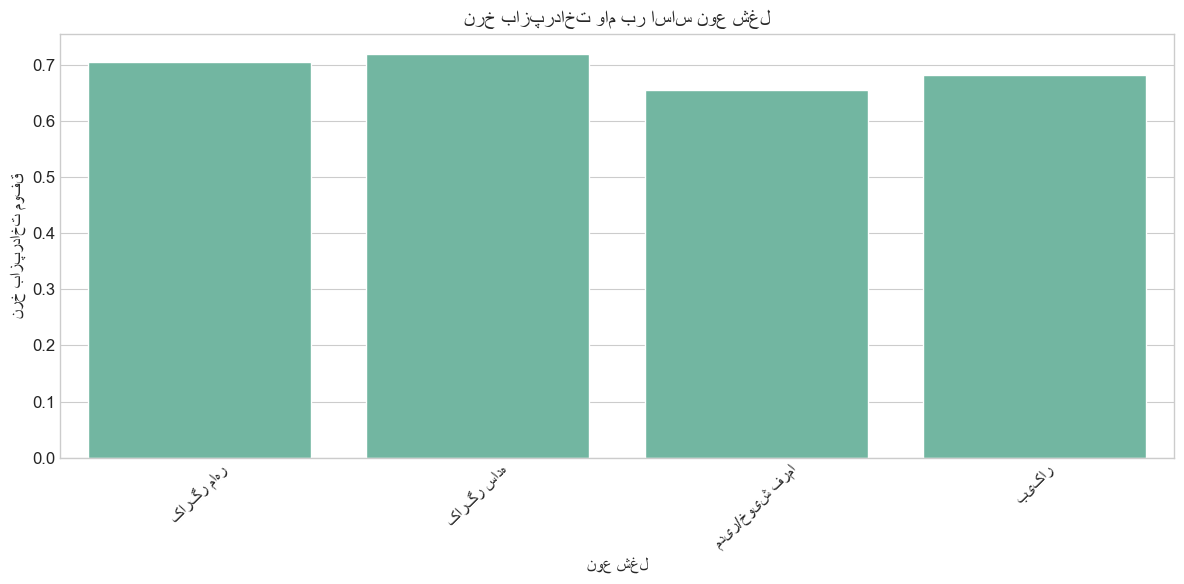

In [212]:
# ÿ™ÿ≠ŸÑ€åŸÑ ÿ¥ÿ∫ŸÑ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å
print("ÿ™ÿ≠ŸÑ€åŸÑ ÿ¥ÿ∫ŸÑ Ÿà ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å")

job_analysis = df.groupby('job').agg({
    'credit_risk': ['count', 'mean'],
    'amount': 'mean',
    'age': 'mean'
}).round(3)

job_analysis.columns = ['ÿ™ÿπÿØÿßÿØ ŸàÿßŸÖ', 'ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ', 'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ']
print(job_analysis)

# ŸÜŸÖŸàÿØÿßÿ± ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ¥ÿ∫ŸÑ
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='credit_risk', data=df, errorbar=None)
plt.title('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸàÿßŸÖ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÜŸàÿπ ÿ¥ÿ∫ŸÑ')
plt.xlabel('ŸÜŸàÿπ ÿ¥ÿ∫ŸÑ')
plt.ylabel('ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ŸÖŸàŸÅŸÇ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ŸÖÿØ€åÿ±ÿßŸÜ Ÿà ÿÆŸà€åÿ¥ ŸÅÿ±ŸÖÿßŸáÿß ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∏€∞Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
# ÿ®€å⁄©ÿßÿ±ÿßŸÜ ⁄©ŸÖÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€¥€µŸ™) ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ
# ŸÖÿØ€åÿ±ÿßŸÜ ÿ®ÿßŸÑÿßÿ™ÿ±€åŸÜ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ÿ±ÿß ÿØÿ±€åÿßŸÅÿ™ ŸÖ€å‚Äå⁄©ŸÜŸÜÿØ

ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿØÿ™ ÿßÿ¥ÿ™ÿ∫ÿßŸÑ:
employment_duration
€¥-€∑ ÿ≥ÿßŸÑ           0.775862
ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €∑ ÿ≥ÿßŸÑ    0.747036
€±-€¥ ÿ≥ÿßŸÑ           0.693215
ÿ®€å⁄©ÿßÿ±             0.629032
⁄©ŸÖÿ™ÿ± ÿßÿ≤ €± ÿ≥ÿßŸÑ     0.593023
Name: credit_risk, dtype: float64


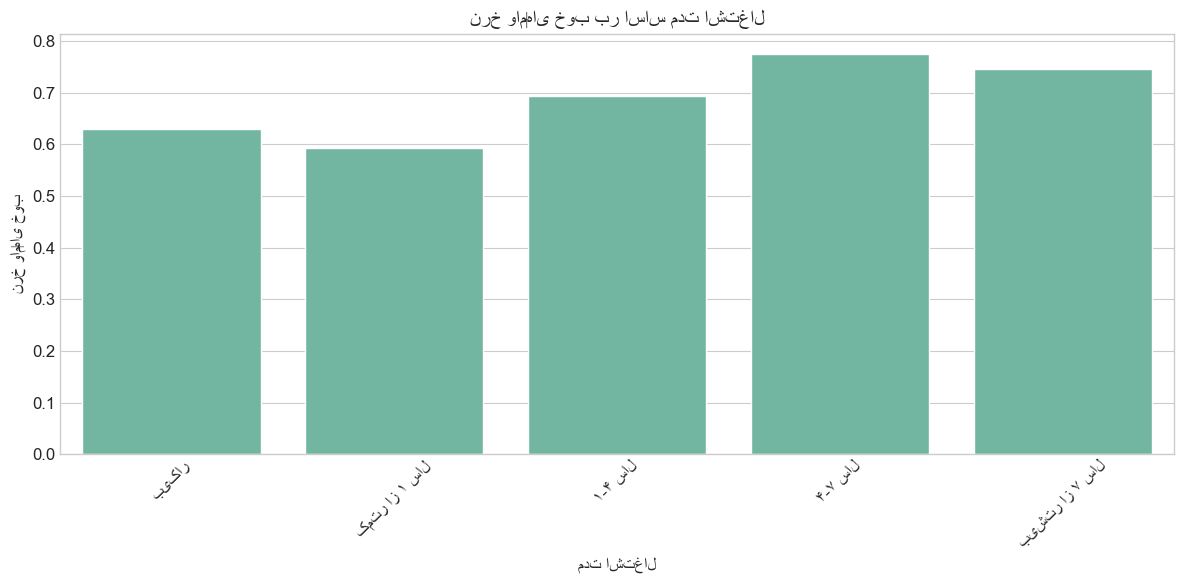

In [213]:
# ÿ™ÿ≠ŸÑ€åŸÑ ŸÖÿØÿ™ ÿßÿ¥ÿ™ÿ∫ÿßŸÑ
employment_analysis = df.groupby('employment_duration')['credit_risk'].mean()
print("ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿØÿ™ ÿßÿ¥ÿ™ÿ∫ÿßŸÑ:")
print(employment_analysis.sort_values(ascending=False))

plt.figure(figsize=(12, 6))
employment_order = ['ÿ®€å⁄©ÿßÿ±', '⁄©ŸÖÿ™ÿ± ÿßÿ≤ €± ÿ≥ÿßŸÑ', '€±-€¥ ÿ≥ÿßŸÑ', '€¥-€∑ ÿ≥ÿßŸÑ', 'ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €∑ ÿ≥ÿßŸÑ']
sns.barplot(x='employment_duration', y='credit_risk', data=df, errorbar=None, order=employment_order)
plt.title('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ® ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿØÿ™ ÿßÿ¥ÿ™ÿ∫ÿßŸÑ')
plt.xlabel('ŸÖÿØÿ™ ÿßÿ¥ÿ™ÿ∫ÿßŸÑ')
plt.ylabel('ŸÜÿ±ÿÆ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿÆŸàÿ®')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ÿ™Ÿàÿ∂€åÿ≠ ÿ™ÿ≠ŸÑ€åŸÑ:
# ÿ´ÿ®ÿßÿ™ ÿ¥ÿ∫ŸÑ€å ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ≥ÿ™ŸÇ€åŸÖ€å ÿ®ÿß ÿ±€åÿ≥⁄© ÿßÿπÿ™ÿ®ÿßÿ±€å ÿØÿßÿ±ÿØ
# ÿßŸÅÿ±ÿßÿØ ÿ®ÿß ÿ≥ÿßÿ®ŸÇŸá ⁄©ÿßÿ± ÿ®€åÿ¥ ÿßÿ≤ €∑ ÿ≥ÿßŸÑ ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ (€∏€∞Ÿ™) ÿ±ÿß ÿØÿßÿ±ŸÜÿØ

In [214]:
# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß Ÿà ÿßÿπÿØÿßÿØ ⁄©ŸÑ€åÿØ€å
print("ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß Ÿà ÿßÿπÿØÿßÿØ ⁄©ŸÑ€åÿØ€å")

# ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ÿ≥ŸÜ€å
age_thresholds = {
    'ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ±€åÿ≥⁄© ÿ¨ŸàÿßŸÜÿßŸÜ': df[df['age'] <= 25]['credit_risk'].mean(),
    'ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ±€åÿ≥⁄© ŸÖ€åÿßŸÜÿ≥ÿßŸÑÿßŸÜ': df[(df['age'] > 35) & (df['age'] <= 45)]['credit_risk'].mean(),
    'ÿ≠ÿØÿßŸÇŸÑ ÿ±€åÿ≥⁄© ÿ≥ÿßŸÑŸÖŸÜÿØÿßŸÜ': df[df['age'] > 65]['credit_risk'].mean()
}

# ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ
amount_thresholds = {
    'ŸÖÿ®ŸÑÿ∫ ÿ®Ÿá€åŸÜŸá ŸàÿßŸÖ': df.groupby('amount_group')['credit_risk'].mean().idxmax(),
    'ŸÖÿ®ŸÑÿ∫ Ÿæÿ±ÿ±€åÿ≥⁄© ŸàÿßŸÖ': df.groupby('amount_group')['credit_risk'].mean().idxmin(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ŸÖŸàŸÅŸÇ': df[df['credit_risk'] == 1]['amount'].mean(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ŸÜÿßŸÖŸàŸÅŸÇ': df[df['credit_risk'] == 0]['amount'].mean()
}

# ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿØÿ™ ŸàÿßŸÖ
duration_thresholds = {
    'ŸÖÿØÿ™ ÿ®Ÿá€åŸÜŸá ŸàÿßŸÖ': df.groupby(pd.cut(df['duration'], bins=5))['credit_risk'].mean().idxmax(),
    'ŸÖÿØÿ™ Ÿæÿ±ÿ±€åÿ≥⁄© ŸàÿßŸÖ': df.groupby(pd.cut(df['duration'], bins=5))['credit_risk'].mean().idxmin(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ ŸÖŸàŸÅŸÇ': df[df['credit_risk'] == 1]['duration'].mean(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ ŸÜÿßŸÖŸàŸÅŸÇ': df[df['credit_risk'] == 0]['duration'].mean()
}

print("ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ÿ≥ŸÜ€å:")
for key, value in age_thresholds.items():
    print(f"{key}: {value:.3f}")

print("\nÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ:")
for key, value in amount_thresholds.items():
    print(f"{key}: {value}")

print("\nÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿØÿ™ ŸàÿßŸÖ:")
for key, value in duration_thresholds.items():
    print(f"{key}: {value}")

# ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨
results = {
    'ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ŸàÿßŸÖ‚ÄåŸáÿß': len(df),
    'ŸÜÿ±ÿÆ ⁄©ŸÑ€å ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™': df['credit_risk'].mean(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ': df['age'].mean(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ': df['amount'].mean(),
    'ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ': df['duration'].mean()
}

print("\nŸÜÿ™ÿß€åÿ¨ ⁄©ŸÑ€å:")
for key, value in results.items():
    print(f"{key}: {value:.2f}")



ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß Ÿà ÿßÿπÿØÿßÿØ ⁄©ŸÑ€åÿØ€å
ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ÿ≥ŸÜ€å:
ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ±€åÿ≥⁄© ÿ¨ŸàÿßŸÜÿßŸÜ: 0.579
ÿ≠ÿØÿß⁄©ÿ´ÿ± ÿ±€åÿ≥⁄© ŸÖ€åÿßŸÜÿ≥ÿßŸÑÿßŸÜ: 0.757
ÿ≠ÿØÿßŸÇŸÑ ÿ±€åÿ≥⁄© ÿ≥ÿßŸÑŸÖŸÜÿØÿßŸÜ: 0.722

ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ:
ŸÖÿ®ŸÑÿ∫ ÿ®Ÿá€åŸÜŸá ŸàÿßŸÖ: 5000-2000
ŸÖÿ®ŸÑÿ∫ Ÿæÿ±ÿ±€åÿ≥⁄© ŸàÿßŸÖ: ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ 10000
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ŸÖŸàŸÅŸÇ: 2985.457142857143
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ ŸÜÿßŸÖŸàŸÅŸÇ: 3938.1266666666666

ÿ¢ÿ≥ÿ™ÿßŸÜŸá‚ÄåŸáÿß€å ŸÖÿØÿ™ ŸàÿßŸÖ:
ŸÖÿØÿ™ ÿ®Ÿá€åŸÜŸá ŸàÿßŸÖ: (3.932, 17.6]
ŸÖÿØÿ™ Ÿæÿ±ÿ±€åÿ≥⁄© ŸàÿßŸÖ: (44.8, 58.4]
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ ŸÖŸàŸÅŸÇ: 19.207142857142856
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ ŸÜÿßŸÖŸàŸÅŸÇ: 24.86

ŸÜÿ™ÿß€åÿ¨ ⁄©ŸÑ€å:
ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ŸàÿßŸÖ‚ÄåŸáÿß: 1000.00
ŸÜÿ±ÿÆ ⁄©ŸÑ€å ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™: 0.70
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥ŸÜ ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ: 35.55
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ®ŸÑÿ∫ ŸàÿßŸÖ: 3271.26
ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿØÿ™ ŸàÿßŸÖ: 20.90


In [187]:
# ŸÜÿ™€åÿ¨Ÿá‚Äå⁄Ø€åÿ±€å ŸÜŸáÿß€å€å
print("üéØ ŸÜÿ™€åÿ¨Ÿá‚Äå⁄Ø€åÿ±€å ŸÜŸáÿß€å€å Ÿà Ÿæ€åÿ¥ŸÜŸáÿßÿØÿßÿ™")

conclusions = [
    "€±. ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ ŸàÿßŸÖ Ÿáÿ≥ÿ™ŸÜÿØ (ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ €∑€∏Ÿ™)",
    "€≤. ŸÖÿØ€åÿ±ÿßŸÜ Ÿà ÿÆŸà€åÿ¥ ŸÅÿ±ŸÖÿßŸáÿß ⁄©ŸÖ‚Äåÿ±€åÿ≥⁄©‚Äåÿ™ÿ±€åŸÜ ⁄Øÿ±ŸàŸá ÿ¥ÿ∫ŸÑ€å Ÿáÿ≥ÿ™ŸÜÿØ",
    "€≥. ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿ®ŸÑÿ∫ €≤€∞€∞€∞-€µ€∞€∞€∞ ŸÖÿßÿ±⁄© ÿ®Ÿáÿ™ÿ±€å ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ",
    "€¥. ÿ≤ŸÜÿßŸÜ ŸÖÿ¨ÿ±ÿØ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ≥ÿßÿ®ŸÇŸá ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ",
    "€µ. ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ≥ÿ™ŸÇ€åŸÖ ÿ®€åŸÜ ÿ´ÿ®ÿßÿ™ ÿ¥ÿ∫ŸÑ€å Ÿà ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ",
    "€∂. ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿØÿ™ €±€≤-€≤€¥ ŸÖÿßŸá ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ™ÿß€åÿ¨ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ"
]

print("üí° €åÿßŸÅÿ™Ÿá‚ÄåŸáÿß€å ⁄©ŸÑ€åÿØ€å:")
for conclusion in conclusions:
    print(f"‚Ä¢ {conclusion}")

print("\nüìã Ÿæ€åÿ¥ŸÜŸáÿßÿØÿßÿ™ ÿßÿ¨ÿ±ÿß€å€å:")
recommendations = [
    "ÿßÿπÿ∑ÿß€å ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ™ÿ±ÿ¨€åÿ≠€å ÿ®Ÿá ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá",
    "ÿ™ŸÖÿ±⁄©ÿ≤ ÿ®ÿ± ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ ÿ®ÿß ÿ≥ÿßÿ®ŸÇŸá ⁄©ÿßÿ± ÿ®€åÿ¥ ÿßÿ≤ €¥ ÿ≥ÿßŸÑ",
    "ÿ™ÿπ€å€åŸÜ ÿ≥ŸÇŸÅ ŸàÿßŸÖ ÿ®Ÿá€åŸÜŸá €≤€∞€∞€∞-€µ€∞€∞€∞ ŸÖÿßÿ±⁄©",
    "ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™ŸÜ ÿßŸÖÿ™€åÿßÿ≤ ŸÖÿ´ÿ®ÿ™ ÿ®ÿ±ÿß€å ÿ≤ŸÜÿßŸÜ ŸÖÿ¨ÿ±ÿØ",
    "ÿßÿπŸÖÿßŸÑ ŸÜÿ±ÿÆ ÿ≥ŸàÿØ ŸÖÿ™ŸÅÿßŸàÿ™ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ⁄Øÿ±ŸàŸá ÿ≥ŸÜ€å Ÿà ÿ¥ÿ∫ŸÑ€å",
    "Ÿæÿß€åÿ¥ ÿØŸÇ€åŸÇ ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿØÿ™ ÿ®€åÿ¥ ÿßÿ≤ €¥€∏ ŸÖÿßŸá"
]

for i, recommendation in enumerate(recommendations, 1):
    print(f"{i}. {recommendation}")

# ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨ ŸÜŸáÿß€å€å
df.to_csv('ÿ™ÿ≠ŸÑ€åŸÑ_⁄©ÿßŸÖŸÑ_ÿßÿπÿ™ÿ®ÿßÿ±€å.csv', index=False, encoding='utf-8-sig')
print(f"\n‚úÖ ŸÜÿ™ÿß€åÿ¨ ÿ™ÿ≠ŸÑ€åŸÑ ÿØÿ± ŸÅÿß€åŸÑ 'ÿ™ÿ≠ŸÑ€åŸÑ_⁄©ÿßŸÖŸÑ_ÿßÿπÿ™ÿ®ÿßÿ±€å.csv' ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØ.")

üéØ ŸÜÿ™€åÿ¨Ÿá‚Äå⁄Ø€åÿ±€å ŸÜŸáÿß€å€å Ÿà Ÿæ€åÿ¥ŸÜŸáÿßÿØÿßÿ™
üí° €åÿßŸÅÿ™Ÿá‚ÄåŸáÿß€å ⁄©ŸÑ€åÿØ€å:
‚Ä¢ €±. ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ ŸàÿßŸÖ Ÿáÿ≥ÿ™ŸÜÿØ (ŸÜÿ±ÿÆ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ €∑€∏Ÿ™)
‚Ä¢ €≤. ŸÖÿØ€åÿ±ÿßŸÜ Ÿà ÿÆŸà€åÿ¥ ŸÅÿ±ŸÖÿßŸáÿß ⁄©ŸÖ‚Äåÿ±€åÿ≥⁄©‚Äåÿ™ÿ±€åŸÜ ⁄Øÿ±ŸàŸá ÿ¥ÿ∫ŸÑ€å Ÿáÿ≥ÿ™ŸÜÿØ
‚Ä¢ €≥. ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿ®ŸÑÿ∫ €≤€∞€∞€∞-€µ€∞€∞€∞ ŸÖÿßÿ±⁄© ÿ®Ÿáÿ™ÿ±€å ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ
‚Ä¢ €¥. ÿ≤ŸÜÿßŸÜ ŸÖÿ¨ÿ±ÿØ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ≥ÿßÿ®ŸÇŸá ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ
‚Ä¢ €µ. ÿ±ÿßÿ®ÿ∑Ÿá ŸÖÿ≥ÿ™ŸÇ€åŸÖ ÿ®€åŸÜ ÿ´ÿ®ÿßÿ™ ÿ¥ÿ∫ŸÑ€å Ÿà ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ≤Ÿæÿ±ÿØÿßÿÆÿ™ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ
‚Ä¢ €∂. ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ®ÿß ŸÖÿØÿ™ €±€≤-€≤€¥ ŸÖÿßŸá ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ™ÿß€åÿ¨ ÿ±ÿß ÿØÿßÿ±ŸÜÿØ

üìã Ÿæ€åÿ¥ŸÜŸáÿßÿØÿßÿ™ ÿßÿ¨ÿ±ÿß€å€å:
1. ÿßÿπÿ∑ÿß€å ŸàÿßŸÖ‚ÄåŸáÿß€å ÿ™ÿ±ÿ¨€åÿ≠€å ÿ®Ÿá ÿßŸÅÿ±ÿßÿØ €≥€∂-€¥€µ ÿ≥ÿßŸÑŸá
2. ÿ™ŸÖÿ±⁄©ÿ≤ ÿ®ÿ± ŸÖÿ™ŸÇÿßÿ∂€åÿßŸÜ ÿ®ÿß ÿ≥ÿßÿ®ŸÇŸá ⁄©ÿßÿ± ÿ®€åÿ¥ ÿßÿ≤ €¥ ÿ≥ÿßŸÑ
3. ÿ™ÿπ€å€åŸÜ ÿ≥ŸÇŸÅ ŸàÿßŸÖ ÿ®Ÿá€åŸÜŸá €≤€∞€∞€∞-€µ€∞€∞€∞ ŸÖÿßÿ±⁄©
4. 